In [1]:
import glob
import os
import pandas as pd
import numpy as np
import re

In [2]:
cols = ['iteration', 'n_estimators', 'max_features', 'max_depth', 'min_samples_leaf',\
                              'min_samples_split', 'subsample', 'learning_rate', 'verbose']

In [3]:
os.getcwd()
main_dir = '/projects/cgr/users/cgr-ds/drugnome-ai/drug/drugnomeAI/'
clin_dir = os.path.join(main_dir, 'GB/')
tier_dir = os.path.join(main_dir, 'GB_tier/')
print(clin_dir, tier_dir)

/projects/cgr/users/cgr-ds/drugnome-ai/drug/drugnomeAI/GB/ /projects/cgr/users/cgr-ds/drugnome-ai/drug/drugnomeAI/GB_tier/


In [4]:
confs = []
for file in glob.glob(clin_dir + "gb_*.txt"):
#     print(file)
    data = pd.read_csv(file, sep='\ ', header=None, engine='python')
#     print(data)
    data = data[1]
#     print(data)
    iteration = re.findall('[0-9]+', file)
    params = iteration + data.tolist()
    confs.append(params)
confs = pd.DataFrame(confs, columns=cols)

In [5]:
confs['Tclin AUC'] = 0
confs['Tier1 AUC'] = 0
confs.index = confs.iteration
confs.sort_index(inplace=True)
confs.head()

,iteration,n_estimators,max_features,max_depth,min_samples_leaf,min_samples_split,subsample,learning_rate,verbose,Tclin AUC,Tier1 AUC
iteration,,,,,,,,,,,
0,0,10,sqrt,3,4,5,0.8,0.001,0,0,0
1,1,10,sqrt,5,4,5,0.8,0.001,0,0,0
10,10,400,sqrt,3,4,5,0.8,0.001,0,0,0
11,11,400,sqrt,5,4,5,0.8,0.001,0,0,0
12,12,500,sqrt,3,4,5,0.8,0.001,0,0,0


In [6]:
for i in confs.iteration:
#     print(i)
    path = os.path.join(clin_dir, "gb_"+ str(i), "supervised-learning", "Avg_AUC_per_classifier.txt")
#     print(path)
    result = pd.read_csv(path, sep='\t').columns[1]
    confs.loc[i, 'Tclin AUC'] = result
    
    path = os.path.join(tier_dir, "gb_"+ str(i), "supervised-learning", "Avg_AUC_per_classifier.txt")
#     print(path)
    result = pd.read_csv(path, sep='\t').columns[1]
    confs.loc[i, 'Tier1 AUC'] = result

In [7]:
confs.head()

,iteration,n_estimators,max_features,max_depth,min_samples_leaf,min_samples_split,subsample,learning_rate,verbose,Tclin AUC,Tier1 AUC
iteration,,,,,,,,,,,
0,0,10,sqrt,3,4,5,0.8,0.001,0,0.9655734644758922,0.9175863712460692
1,1,10,sqrt,5,4,5,0.8,0.001,0,0.9804541845559459,0.9385682545967816
10,10,400,sqrt,3,4,5,0.8,0.001,0,0.9799488447695883,0.9438280643930049
11,11,400,sqrt,5,4,5,0.8,0.001,0,0.9835820471082091,0.951089800172459
12,12,500,sqrt,3,4,5,0.8,0.001,0,0.9799081597840772,0.9445329611936525


In [8]:
confs.index

Index(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3',
       '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40',
       '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51',
       '52', '53', '54', '55', '6', '7', '8', '9'],
      dtype='object', name='iteration')

In [9]:
confs['learning_rate'] = confs['learning_rate'].astype(float)
confs['n_estimators'] = confs['n_estimators'].astype(int)
confs['Tclin AUC'] = confs['Tclin AUC'].astype(float)
confs['Tier1 AUC'] = confs['Tier1 AUC'].astype(float)
depth5 = confs[confs.max_depth=='5']
depth3 = confs[confs.max_depth=='3']
depth5.dtypes
# depth5.reset_index(drop=True, inplace=True)

iteration             object
n_estimators           int64
max_features          object
max_depth             object
min_samples_leaf      object
min_samples_split     object
subsample             object
learning_rate        float64
verbose               object
Tclin AUC            float64
Tier1 AUC            float64
dtype: object

In [10]:
import matplotlib.pyplot as plt

In [11]:
confs[confs.learning_rate==0.1]

,iteration,n_estimators,max_features,max_depth,min_samples_leaf,min_samples_split,subsample,learning_rate,verbose,Tclin AUC,Tier1 AUC
iteration,,,,,,,,,,,
28,28,10,sqrt,3,4,5,0.8,0.1,0,0.971305,0.939875
29,29,10,sqrt,5,4,5,0.8,0.1,0,0.977311,0.942261
30,30,50,sqrt,3,4,5,0.8,0.1,0,0.985257,0.956493
31,31,50,sqrt,5,4,5,0.8,0.1,0,0.987741,0.961672
32,32,100,sqrt,3,4,5,0.8,0.1,0,0.987447,0.962610
33,33,100,sqrt,5,4,5,0.8,0.1,0,0.989677,0.965469
34,34,200,sqrt,3,4,5,0.8,0.1,0,0.989873,0.965418
35,35,200,sqrt,5,4,5,0.8,0.1,0,0.990427,0.966155
36,36,300,sqrt,3,4,5,0.8,0.1,0,0.990224,0.965286


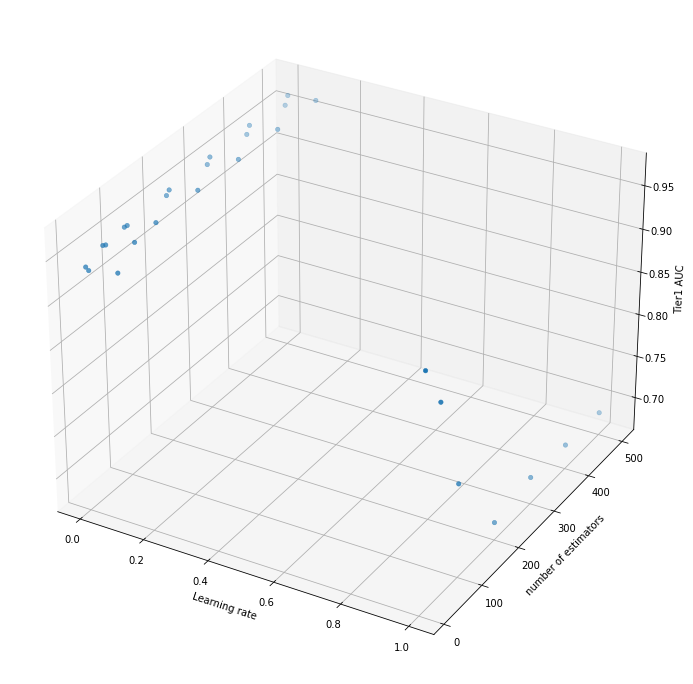

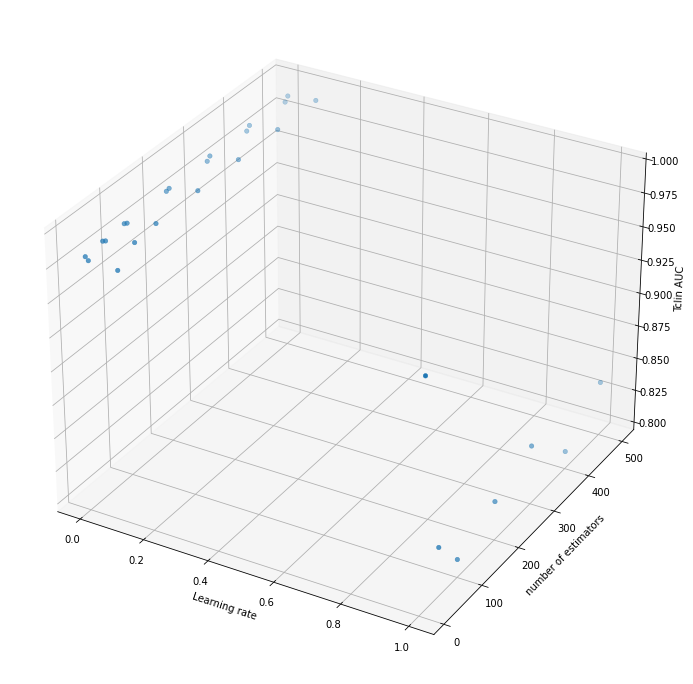

In [12]:
for label in ['Tier1 AUC', 'Tclin AUC']:
    fig = plt.figure(figsize=(12, 15))
    ax1 = fig.add_subplot(projection='3d')
    ax1.scatter(depth5.learning_rate, depth5.n_estimators, depth5[label], cmap='viridis', linewidth=0.5)
    ax1.set_xlabel('Learning rate')
    ax1.set_ylabel('number of estimators')
    ax1.set_zlabel(label)
    plt.show()

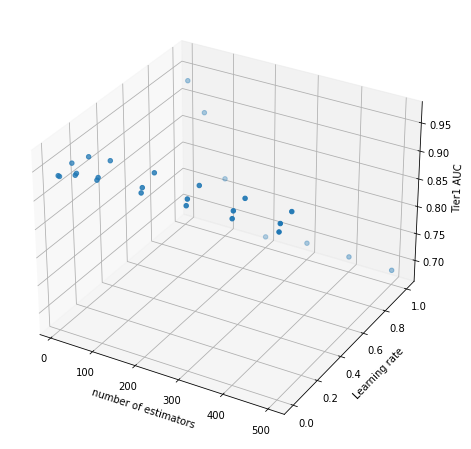

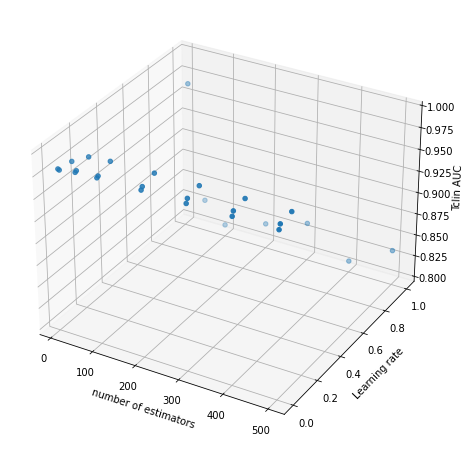

In [13]:
for label in ['Tier1 AUC', 'Tclin AUC']:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(depth5.n_estimators, depth5.learning_rate, depth5[label])
    ax.set_ylabel('Learning rate')
    ax.set_xlabel('number of estimators')
    ax.set_zlabel(label)
    plt.show()

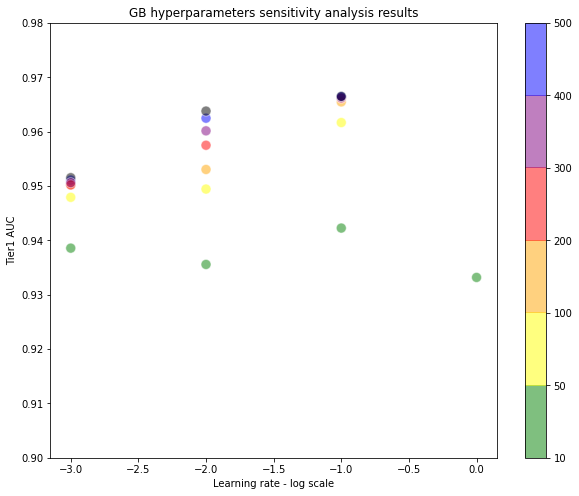

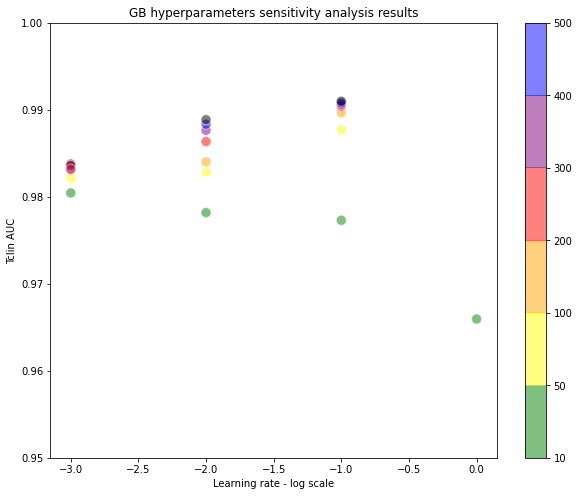

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
for label in ['Tier1 AUC', 'Tclin AUC']:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot()
    cmap, norm = matplotlib.colors.from_levels_and_colors([10, 50, 100, 200, 300, 400, 500], ['green', 'yellow', 'orange', 'red', 'purple', 'blue'])
    pc = ax.scatter(x=np.log10(depth5.learning_rate), y=depth5[label], c=depth5.n_estimators, s=100, edgecolors="white", alpha=0.5, cmap=cmap, norm=norm)
    fig.colorbar(pc, orientation='vertical')
    ax.set_xlabel('Learning rate - log scale')
    ax.set_ylabel(label)
    if label == 'Tier1 AUC':
        plt.ylim(0.9, 0.98)
    else:
        plt.ylim(0.95, 1)
    plt.title("GB hyperparameters sensitivity analysis results")
    plt.show()
    
    fig.savefig(fname = label + '.pdf') #pdf

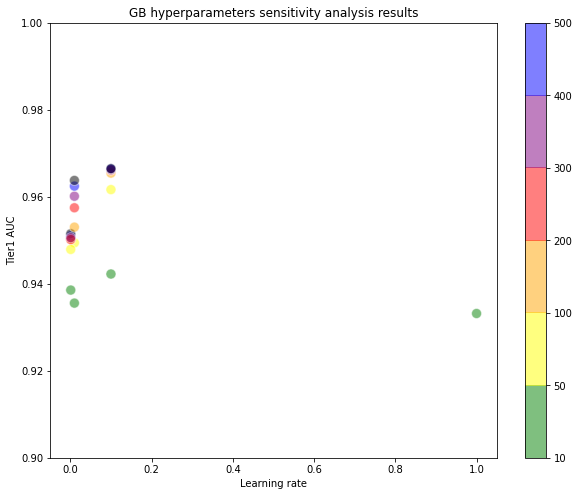

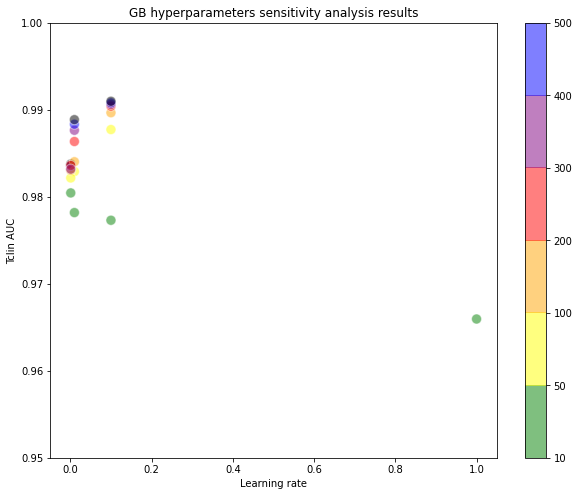

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
for label in ['Tier1 AUC', 'Tclin AUC']:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot()
    cmap, norm = matplotlib.colors.from_levels_and_colors([10, 50, 100, 200, 300, 400, 500], ['green', 'yellow', 'orange', 'red', 'purple', 'blue'])
    pc = ax.scatter(x=depth5.learning_rate, y=depth5[label], c=depth5.n_estimators, s=100, edgecolors="white", alpha=0.5, cmap=cmap, norm=norm)
    fig.colorbar(pc, orientation='vertical')
    ax.set_xlabel('Learning rate')
    ax.set_ylabel(label)
    if label == 'Tier1 AUC':
        plt.ylim(0.9, 1)
    else:
        plt.ylim(0.95, 1)
    plt.title("GB hyperparameters sensitivity analysis results")
    plt.show()
    fig.savefig(fname = '1_' + label + '.pdf')

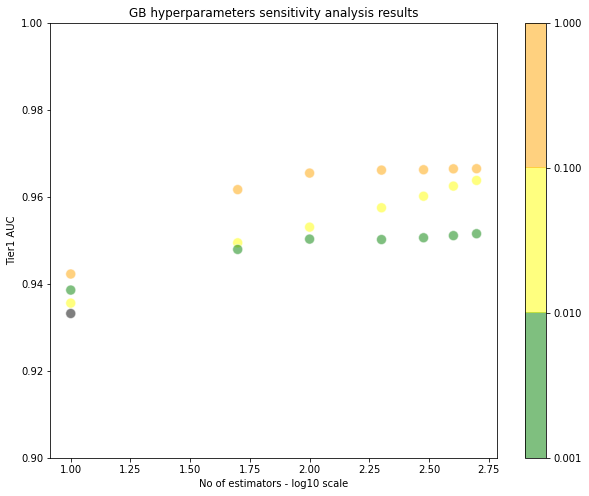

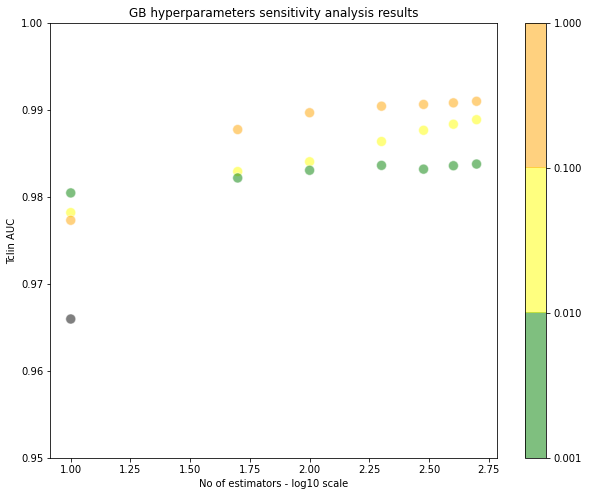

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
for label in ['Tier1 AUC', 'Tclin AUC']:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot()
    cmap, norm = matplotlib.colors.from_levels_and_colors([0.001, 0.01, 0.1, 1], ['green', 'yellow', 'orange'])
    pc = ax.scatter(np.log10(depth5.n_estimators), depth5[label], c=depth5.learning_rate, s=100, edgecolors="white", alpha=0.5, cmap=cmap, norm=norm)
    fig.colorbar(pc, orientation='vertical')
    ax.set_xlabel('No of estimators - log10 scale')
    ax.set_ylabel(label)
    if label == 'Tier1 AUC':
        plt.ylim(0.9, 1)
    else:
        plt.ylim(0.95, 1)
    plt.title("GB hyperparameters sensitivity analysis results")
    plt.show()
    fig.savefig(fname = '2_' + label + '.pdf')

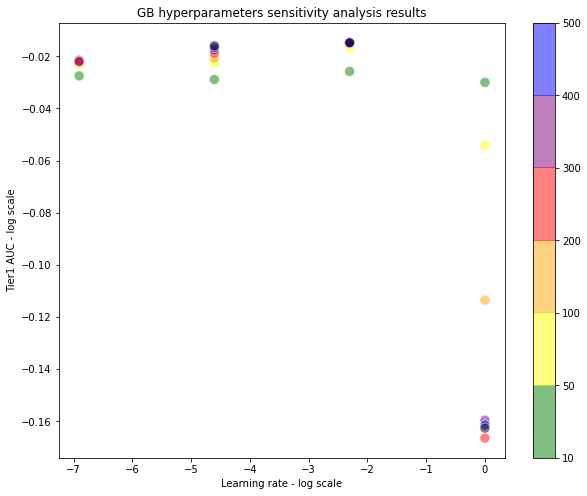

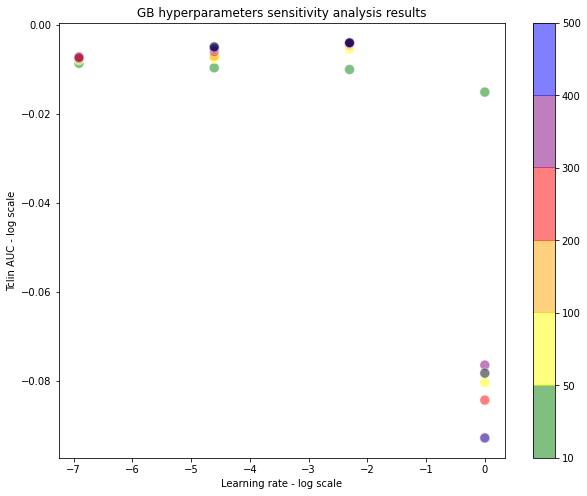

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
for label in ['Tier1 AUC', 'Tclin AUC']:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot()
    cmap, norm = matplotlib.colors.from_levels_and_colors([10, 50, 100, 200, 300, 400, 500], ['green', 'yellow', 'orange', 'red', 'purple', 'blue'])
    pc = ax.scatter(x=np.log(depth5.learning_rate), y=np.log10(depth5[label]), c=depth5.n_estimators, s=100, edgecolors="white", alpha=0.5, cmap=cmap, norm=norm)
    fig.colorbar(pc, orientation='vertical')
    ax.set_xlabel('Learning rate - log scale')
    ax.set_ylabel(label + ' - log scale')
    plt.title("GB hyperparameters sensitivity analysis results")
    plt.show()
    fig.savefig(fname = '3_' + label + '.pdf')

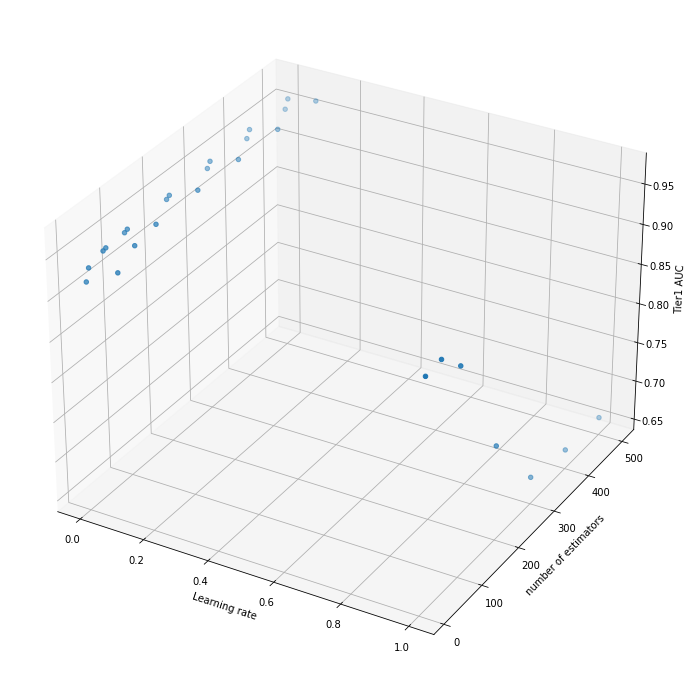

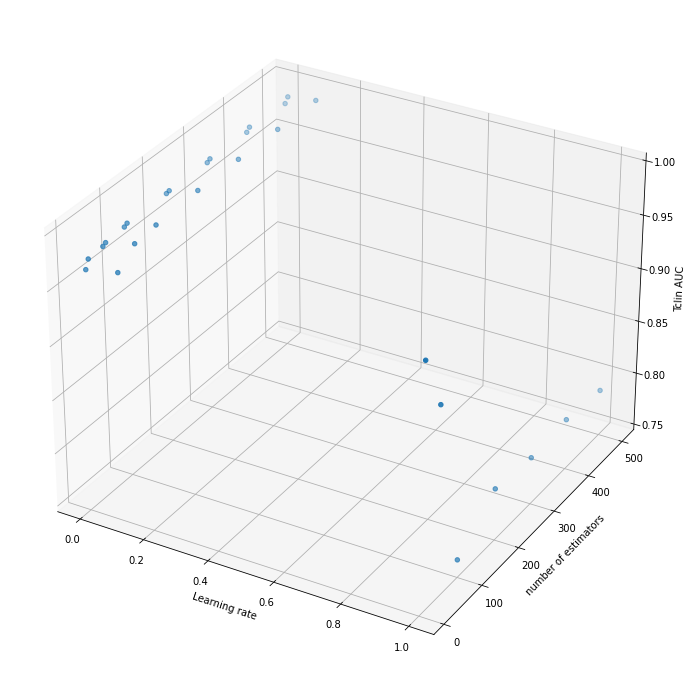

In [55]:
for label in ['Tier1 AUC', 'Tclin AUC']:
    fig = plt.figure(figsize=(12, 15))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(depth3.learning_rate, depth3.n_estimators, depth3[label])
    ax.set_xlabel('Learning rate')
    ax.set_ylabel('number of estimators')
    ax.set_zlabel(label)
    plt.show()

In [20]:
from IPython.display import IFrame, display

In [38]:
filepath = os.path.join(clin_dir, 'gb_0', 'Output-Figures', 'supervised-learning', 'misc', 'All_classifiers.All_genes_proba_Density_plots.pdf')

In [39]:
IFrame(filepath, width=700, height=400)

In [42]:
import matplotlib.pyplot as plt
im = plt.imread(filepath)

UnidentifiedImageError: cannot identify image file '/projects/cgr/users/cgr-ds/drugnome-ai/drug/drugnomeAI/GB/gb_0/Output-Figures/supervised-learning/misc/All_classifiers.All_genes_proba_Density_plots.pdf'

In [26]:
from IPython.display import display

In [43]:
from IPython.display import *
display_pdf(filepath)

In [60]:
open(filepath, 'r')

<_io.TextIOWrapper name='/projects/cgr/users/cgr-ds/drugnome-ai/drug/drugnomeAI/GB/gb_0/Output-Figures/supervised-learning/misc/All_classifiers.All_genes_proba_Density_plots.pdf' mode='r' encoding='UTF-8'>

In [57]:
import PyPDF2

ModuleNotFoundError: No module named 'PyPDF2'